# Sheet 3 : Dynamic programming

In dynamic programming a big problem is split into multiple smaller problems that are computed once and their results are stored. This allows us to reuse existing solutions from previous computations and makes thus recomputation unnecessary. 

Consider the following example. You are trying to find the minimum number of coins for payment/change, and you know the value of each coin in monetary units. Therefore, if the types of coins are {1,2,5} then a payment of 6 monetary units can be done with the possible combinations: `{1,1,1,1,1,1}` , `{1,1,1,1,2}`, `{2,2,1,1}`, `{2,2,2}` and `{5,1}`.

So as we can see minimum number of coins required are 2 (5+1=6). But how should we solve this problem in general?

In this case the solution is rather counterintuitive, because in order to find the right change for an amount of 6 one could first find the amount of change for all possible values that are smaller than 6 and then build up the solution for the smaller amounts. As explained above, the dynamic algorithm would solve this using smaller subproblems. 

A more detailed introduction to this problem using dynamic programming can be found in: http://interactivepython.org/runestone/static/pythonds/Recursion/DynamicProgramming.html

In this worksheet you will implement the Needleman-Wunsch algorithm as an example of dynamic programming and you will use it to estimate the significance of a pair of sequences compared to sequences where the sequence content has been randomly shuffled. 

## Exercise 1: Dynamic programming - Needleman–Wunsch

The Needleman-Wunsch algorithm is a global alignment algorithm that computes the alignment given two sequences. Our implementation here will consist of three major parts. The first part initilizes the alignment matrix, filling the first row and colum with the `gap_penalty` value. The second part computes the alignment matrix using dynamic programming, in which for each new entry the nearest neighbours are used and a function that decides to either add a `match_award` or a `mismatch_penalty` for the diagonal, or a `gap_penalty` if it is not in the diagonal. The third part will compute the alignment by retracing backwards the alignment matrix and finding the optimal strings for the alignment of two sequences. 

There are many resources on the internet on how the matrix is filled, like for example http://avatar.se/lectures/molbioinfo2001/dynprog/adv_dynamic.html


### Task 1: Implement the Needleman-Wunsch algorithm

Please see comment lines for detail about the first task.

In [22]:
# This code is a modified version of the Needleman-Wunsch implementation by https://github.com/alevchuk
import numpy

#-----Needleman-Wunsch Global Alignment-----
#  Input: seq1 = Sequence 1 to align
#         seq2 = Sequence 2 to align
#         match_award = score for aligning identical caracters
#         mismatch_penalty = penalty for aligning two different caracters
#         gap_penalty = penalty for including a gap in the alignment
#         compute_aligment_string = Boolean to compute or not the aligned sequences
#  Output: dictionary:result = alignment score, aligned sequences 1 and 2(seq with gap "-"), 
#  perfectly aligment caracters) 
#
def needleman_wunsch_global(seq1, seq2, match_award=1, mismatch_penalty=-1, gap_penalty=-1,
                            compute_aligment_string=False):
    results = {}
    
    # get length of two sequences
    m = len(seq1) # rows
    n = len(seq2) # columns
  
    # FIRST PART: Matrix initialization
    #-----your code: implementation-----
    
    # Generate the empty matrix u
    matrix = numpy.zeros((m+1, n+1))
    
    # Fill the first column
    for i in range(0, m + 1):
        matrix[i][0] = gap_penalty * i
        
    # Fill the first row
    for j in range(0, n + 1):
        matrix[0][j] = gap_penalty * j
        
    #-----your code-----
        
    # SECOND PART: Calculate alignment matrix

    for i in range(1, m + 1): # from the second row to the bottom
        for j in range(1, n + 1): # from second column to the right    
            # fill the matrix[i][j] cell with the highest score (diagonal,top,left) 
            
            #-----your code: implementation-----
           
            if seq1[i-1] == seq2[j-1]:
                diagonal = match_award 
            else:
                diagonal = mismatch_penalty 
            
            score_diagonal = matrix[i - 1][j - 1] + diagonal
            score_delete = matrix[i - 1][j] + gap_penalty
            score_insert = matrix[i][j - 1] + gap_penalty
            
            matrix[i][j] = max(score_diagonal, score_delete, score_insert)
            
            #-----your code-----
    
    results['score'] = matrix[m,n]
    
    # THIRD PART: Traceback to create alignment  
    if compute_aligment_string:    
        # Traceback of the alignment 
        align1 = ''
        align2 = ''

        # start from the bottom right cell
        i=m
        j=n 

        while i > 0 and j > 0: # end when it reachs the top or the left edge
            # find the neighbour cell (diagonal,top,left) with the highest score and move to this cell 
            # (modifying i and j). Don't forget to update the align1 and align2 sequences!

            #-----your code: implementation-----
            if seq1[i-1] == seq2[j-1]:
                diagonal = match_award 
            else:
                diagonal = mismatch_penalty 
            
            score_current = matrix[i][j]
            score_diagonal = matrix[i - 1][j - 1] + diagonal
            score_up = matrix[i][j-1] + gap_penalty
            score_left = matrix[i-1][j] + gap_penalty

            if score_current == score_diagonal:
                align1 = seq1[i-1] + align1
                align2 = seq2[j-1] + align2
                i -= 1
                j -= 1
            elif score_current == score_left:
                align1 = seq1[i-1] + align1
                align2 = '-' + align2
                i -= 1
            else: # score_current == score_up, or roundoff error (*)
                align1 = '-' + align1
                align2 = seq2[j-1] + align2
                j -= 1
            
            # (*) to avoid roundoff errors, find element closest to current score:
            # min_value = min([score_diagonal, score_left, score_up], key=lambda x:abs(x-score_current)) # OR
            # min_idx = numpy.abs(score_current - numpy.array([score_diagonal, score_left, score_up])).argmin()
            # OBS: in first case actual value is returned; index can be returned using y.index(min(y))
            
            #-----your code-----

        # Finish tracing back to the top left cell, do almost the same as before in case one aligned 
        # sequence is bigger than the other one)

        #-----your code: implementation-----
        while i > 0:
            align1 = seq1[i-1] + align1
            align2 = '-' + align2
            i -= 1
        while j > 0:
            align1 = '-' + align1
            align2 = seq2[j-1] + align2
            j -= 1

        #-----your code-----

        results["align1"] = align1
        results["align2"] = align2
    
    return results

In [33]:
import math
from datasketch import MinHash

def splitseq(seq,k):
    return [ seq[i:(i+k)] for i in range( len(seq)-k+1) ]

def gen_kmers(seq, maxk= 7, mink = 3):
    if maxk is None:
        maxk = len(seq)
    return [ s for k in range(mink,maxk) for s in splitseq(seq ,k)]

def gensig( seq , nperm = 512 ):
    h1 = MinHash(nperm)
    [ h1.update(k.encode('utf8')) for k in gen_kmers(seq) ]
    return h1

def gendigest( seq , nperm = 512 ):
    h1 = MinHash(nperm)
    [ h1.update(k.encode('utf8')) for k in gen_kmers(seq) ]
    return h1.digest()

def updatesig(mh1,mh2):
    mh1.merge(mh2)

def compare( s1, s2 ):
    h1 =gensig(s1)
    h2 =gensig(s2)
    return h1.jaccard(h2)


## Task 2: Test your implementation

To test our implementation we will make use of a real world example using the p53 gene, which is conserved in many animals. More precisly we will make use of just a part of the gene, but the algorithm is general enough to work with any sequence. Use the given sequences (`seq1` and `seq2`) to test your implementation of the Needleman-Wunsch algorithm!

In [34]:
match    = 1
mismatch = -1
gap      = -1

seq1 ='FNMADSTEPNLPDSQESFSEFWCSSLQTNDFPNIVIDESALPATSNWQTYTTMAPVCSLLDIGAQINHGDDTGLFDFNVEAGELLGRRVVS'
seq2 ='MAVADTSELNFPDSQESFSDFWMNTLSENNELPSWQTDLNQEYDQCKETVDVLQLDTTKANDIEFPVSEFLTSSQASQQSIGDLFAQSLPS'

results = needleman_wunsch_global(seq1,seq2,match_award=match, mismatch_penalty=mismatch, gap_penalty=gap,
                                  compute_aligment_string=True)


print( compare(seq1,seq2) )
print( compare(seq1,seq1) )
reference_score_hash = compare(seq1,seq2)

for res, value in results.items():
    print (res, value)
    



0.048828125
1.0
score -30.0
align1 FNMAD-STEPNLPDSQESFSEFWCSSL-QTNDFPNIVID---E-SALPAT-SNWQTYTTMA-----PVCS--LLDIGA-QINHGDDTGLFDFNVEAGELLGRRVVS
align2 MAVADTS-ELNFPDSQESFSDFWMNTLSENNELPSWQTDLNQEYDQCKETVDVLQLDTTKANDIEFPV-SEFLTSSQASQQSIG-D--L--F---A-QSL----PS


## Exercise 2: Alignment significance using permutation test and Gumbel distribution

In the next part we will test the signficance of your alignment using a permutation test, as well as by fitting it to a Gumbel distribution. In both cases you will obtain a p-value that assess how likely it is to obtain such a score by chance. If your algorithm worked correctly you should have obtained a score of `-30` for the provided sequences. But is a score of `-30` significant? To answer this question, we need to see whether it is better than the range of scores that we could obtain using random, and therefore unrelated, sequences as input.

### Task 1: Write a function that randomly shuffles  a given sequence string

How can we generate "random sequences"? To make the comparison as relevant as possible, we need to generate random sequences that are unrelated but otherwise as similar as possible to the original sequences. Shuffling the sequences meets this requirement, as it preserves the length and amino-acid composition of the original sequences. Randomly shuffling a sequence string is equivalent to picking randomly all cards from a given deck of cards without returning them, and piling them up in the sampling order. A deck with `n` cards allows therefore for `n!` possible permutations.

__Hint:__ This can be done with one line of code using the `random.sample` function.

In [35]:
import random

#-----Function shuffle_sequence-----
#  Input: string = string to be aligned
#  Output: string = string with reshuffled letters of input string
#
def shuffle_sequence(string):
    #-----your code: implementation-----
    return ''.join(random.sample(string,len(string)))
    #-----your code-----

### Task 2: Generate a reference score and calculate the score for 1000 randomly shuffled sequences

First you will compute a reference score given a sequence string using your function above, and then you will randomly shuffle both sequences 1000 times each time computing the alignment score and saving it in an output array.

In [109]:
%%time
match    = 1
mismatch = -1
gap      = -1

seq1 ='FNMADSTEPNLPDSQESFSEFWCSSLQTNDFPNIVIDESALPATSNWQTYTTMAPVCSLLDIGAQINHGDDTGLFDFNVEAGELLGRRVVS'
seq2 ='MAVADTSELNFPDSQESFSDFWMNTLSENNELPSWQTDLNQEYDQCKETVDVLQLDTTKANDIEFPVSEFLTSSQASQQSIGDLFAQSLPS'

results = needleman_wunsch_global(seq1,seq2,match, mismatch, gap) # compute_aligment_string = False
reference_score = results['score']

permutation_scores = []
permutation_scores_hash = []

seq1 = seq1[0:int(len(seq1)/2 ) ]

seq2 = seq2[0:int(len(seq2)/2 )]


# calcuate the permutation scores for 1000 times reshuffled sequences
#-----your code: implementation-----
for i in range(0,1000):
    shuffle_seq1 = shuffle_sequence(seq1)
    shuffle_seq2 = shuffle_sequence(seq2)
    shuffle_results = needleman_wunsch_global(shuffle_seq1, shuffle_seq2, match, mismatch, gap)
    permutation_scores.append(shuffle_results['score'])
    permutation_scores_hash.append(compare(shuffle_seq1, shuffle_seq2 ))
#-----your code-----

print (permutation_scores[0])

-25.0
CPU times: user 28.7 s, sys: 6.18 s, total: 34.9 s
Wall time: 32.5 s


### Task 3: Plot a histogram of your permutation scores

Use the `matplotlib.pyplot` library to plot the histogram of the permutation scores additionally plot a bar at the position where your reference score is located.

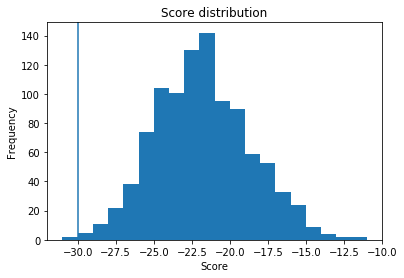

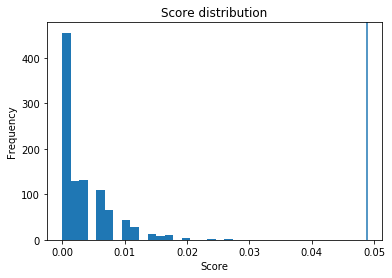

In [110]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

#-----your code: implementation-----
plt.hist(permutation_scores,20)
plt.title("Score distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.axvline(reference_score)
#-----your code-----

plt.show()

#-----your code: implementation-----
plt.hist(permutation_scores_hash,20)
plt.title("Score distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.axvline(reference_score_hash)
#-----your code-----

plt.show()

### Task 4: Compute the associated p-value for your reference score

In order to estimate whether our reference score is compatible with scores produced by randomly shuffling the sequences, we will estimate its p-value. In order to do so we will check whether each random score is smaller than the reference score. If it is smaller than the reference score we will increase the count for the scores smaller than the reference value. The associated p-value is then `1-(number_value_smaller/number_samples)`, noting that the reference score is assumed to be part of the sample. Equivalently you can count how many sample scores (random or not) are larger or equal to the observed one, and its fraction will be the p-value. 

In [111]:
# p_value = number of samples bigger than the reference + 1 for the reference / numbers of samples + 1 for the reference

#-----your code: implementation-----
number_value_smaller = 0
# calculate the number of samples smaller than the reference score
for score in permutation_scores:
    if score < reference_score:
        number_value_smaller +=1

# estimate the number of total samples + 1
number_samples = len(permutation_scores) +1
# calculate the p-value
p_value = 1-(float(number_value_smaller) / float(number_samples))
#-----your code-----

print (p_value)

0.998001998001998


### Task 5: Compute the associate p-value using an estimated Gumbel distribution

Here we will make use of the Gumbel distribution in order to assess statistical signifcance using a fitted distribution. To use this function you will have to make use of the `from scipy.stats import gumbel_r` class. More information about this class is found in http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.stats.gumbel_r.html. Notice that the while the "left-skewed" Gumbel models minimum values, the "right-skewed" Gumbel models the distribution of maximum values and has PDF

$$pdf(x\mid \mu,\beta)=\frac{1}{\beta}e^{-(\frac{x-\mu}{\beta}\ +\ e^{-\frac{x-\mu}{\beta}})}$$

First you will use the `fit` method with your `permutation_scores` to estimate the `loc` and `scale` parameters (respectively $\mu$ and $\beta$ in the equation above). These two parameters describe the Gumbel distribution that best fits your dataset. Using this distribution you can obtain the p-value for your `reference_score` with `1-cdf(...)`. The `cdf` function basically calculates the area of a Gumbel distribution from minus infinity up to the desired value (in our case, the reference score). This is in principle similar to what you have done in Task 4. 

In [112]:
from scipy.stats import gumbel_r

#-----your code: implementation-----
# estimate the parameter loc and scale using the fit function
loc,scale = gumbel_r.fit(permutation_scores)
loc2,scale2 = gumbel_r.fit(permutation_scores_hash)

# calculate the p-value

p_value = 1.-gumbel_r.cdf(reference_score, loc=loc, scale=scale )
p_value2 = 1.-gumbel_r.cdf(reference_score_hash, loc=loc2, scale=scale2 )

#-----your code-----
print (loc,scale, "\t\t p-value = ", p_value)
print (loc2,scale2, "\t\t p-value = ", p_value2)

-23.834994811386885 2.966139770744963 		 p-value =  0.9996618962551214
0.0015269361895492088 0.002676051879422538 		 p-value =  2.106323238049157e-08


### Task 6: Plot the histogram and the fitted probability density function with the reference score as vertical line

/home/cactuskid/.pyenv/versions/miniconda3-latest/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


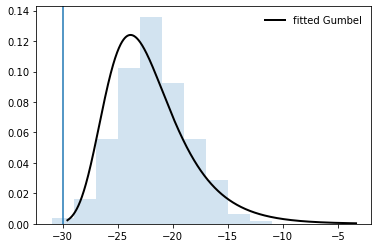

/home/cactuskid/.pyenv/versions/miniconda3-latest/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


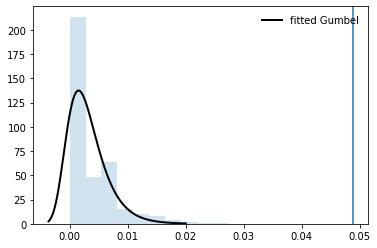

In [113]:
fig, ax = plt.subplots(1, 1)
x = numpy.linspace(gumbel_r.ppf(0.001,loc=loc, scale=scale),gumbel_r.ppf(0.999,loc=loc, scale=scale), 1000)

#-----your code: implementation-----
ax.plot(x, gumbel_r.pdf(x, loc=loc, scale=scale), 'k-', lw=2, label='fitted Gumbel')
ax.hist(permutation_scores, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
ax.axvline(reference_score)
#-----your code-----

plt.show()



fig, ax = plt.subplots(1, 1)
x = numpy.linspace(gumbel_r.ppf(0.001,loc=loc2, scale=scale2),gumbel_r.ppf(0.999,loc=loc2, scale=scale2), 1000)

#-----your code: implementation-----
ax.plot(x, gumbel_r.pdf(x, loc=loc2, scale=scale2), 'k-', lw=2, label='fitted Gumbel')
ax.hist(permutation_scores_hash, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
ax.axvline(reference_score_hash)
#-----your code-----

plt.show()

In [101]:
#so far so good. we can distinguish between homologues  better than the simple smith waterman... 
#now lets go from a bag of proteins to orthologuous groups
#use the bloom filter to avoid sending queries through if theyre alread in a group

import multiprocessing as mp
from bloom_filter import BloomFilter

# some sequences may be more divergent...
# Create a MinHash LSH Forest with the same num_perm parameter
from datasketch import MinHashLSH


import dask.dataframe as dd
import pandas as pd
import dask
import glob

from dask.distributed import Client, LocalCluster

#change here for large deploy

cluster = LocalCluster()
client = Client(cluster)

#generate a dataframe from all the proteomes using delayed objects
@dask.delayed
def return_subdataframe(fastafile):
    with open(fastafile , 'r') as fasta:
        proteome = {}
        protein = None
        for line in fasta:            
            if '>' in line :
                if protein:
                    proteome.update({ seqID:protein})
                words = line.split('|')
                protein = { 'identifier': words[1], 'meta': line , 'seq':''  }
                
                seqID = words[1]
            else :
                protein['seq']+=line
    proteome = pd.DataFrame.from_dict(proteome , orient = 'index')
    proteome['proteome'] = fastafile
    
    return proteome

#make dataframe from delayed objects for each proteome
proteomes = []
files = glob.glob('/home/cactuskid/Downloads/QfO_release_2019_04/Archaea/*.fasta')
print(files)
for f in files[0:2]:
    if 'DNA' not in f:
        proteomes.append(return_subdataframe(f))

#dataframe from delayed objects
proto = pd.DataFrame( data=None, index=None, columns=[ 'identifier', 'meta', 'seq', 'proteome'] , dtype = str )
print(proto)
dd = dask.dataframe.from_delayed( proteomes , meta= proto )

print(dd)


['/home/cactuskid/Downloads/QfO_release_2019_04/Archaea/UP000001686_374847_DNA.fasta', '/home/cactuskid/Downloads/QfO_release_2019_04/Archaea/UP000002487_188937.fasta', '/home/cactuskid/Downloads/QfO_release_2019_04/Archaea/UP000000536_69014_DNA.fasta', '/home/cactuskid/Downloads/QfO_release_2019_04/Archaea/UP000001974_273057.fasta', '/home/cactuskid/Downloads/QfO_release_2019_04/Archaea/UP000000792_436308_DNA.fasta', '/home/cactuskid/Downloads/QfO_release_2019_04/Archaea/UP000000554_64091_DNA.fasta', '/home/cactuskid/Downloads/QfO_release_2019_04/Archaea/UP000000536_69014.fasta', '/home/cactuskid/Downloads/QfO_release_2019_04/Archaea/UP000000554_64091.fasta', '/home/cactuskid/Downloads/QfO_release_2019_04/Archaea/UP000000805_243232_DNA.fasta', '/home/cactuskid/Downloads/QfO_release_2019_04/Archaea/UP000002487_188937_DNA.fasta', '/home/cactuskid/Downloads/QfO_release_2019_04/Archaea/UP000001686_374847.fasta', '/home/cactuskid/Downloads/QfO_release_2019_04/Archaea/UP000001974_273057_DNA

In [102]:
print(dd.compute(client=client))

       identifier                                               meta  \
F1SVF7     F1SVF7  >tr|F1SVF7|F1SVF7_METAC GPR1/FUN34/yaaH family...   
F1SVG6     F1SVG6  >tr|F1SVG6|F1SVG6_METAC Methanol-5-hydroxybenz...   
F1SVI3     F1SVI3  >tr|F1SVI3|F1SVI3_METAC Methanol-5-hydroxybenz...   
F1SVL6     F1SVL6  >tr|F1SVL6|F1SVL6_METAC Methanol-5-hydroxybenz...   
F1SVM3     F1SVM3  >tr|F1SVM3|F1SVM3_METAC Methanol-5-hydroxybenz...   
F1SVM6     F1SVM6  >tr|F1SVM6|F1SVM6_METAC Methanol-5-hydroxybenz...   
P0CG28     P0CG28  >sp|P0CG28|RPOD_METAC DNA-directed RNA polymer...   
P58796     P58796  >sp|P58796|NQOR_METAC NAD(P)H dehydrogenase (q...   
P58812     P58812  >sp|P58812|APGM_METAC 2,3-bisphosphoglycerate-...   
P58828     P58828  >sp|P58828|Y4659_METAC UPF0201 protein MA_4659...   
P58831     P58831  >sp|P58831|Y4660_METAC UPF0200 protein MA_4660...   
P58834     P58834  >sp|P58834|HIS2_METAC Phosphoribosyl-ATP pyrop...   
P58837     P58837  >sp|P58837|G3P1_METAC Glyceraldehyde-3-phosph

In [103]:
#calculate all hashes of kmers in parallel

proto = pd.Series( data = None, index = None , dtype = object)
dd['hashsig'] = dd['seq'].map( gendigest , meta= proto)
dd.compute(client=client)


,identifier,meta,seq,proteome,hashsig
F1SVF7,F1SVF7,>tr|F1SVF7|F1SVF7_METAC GPR1/FUN34/yaaH family...,MSENAASTIIIDKTANAAPLGFTGLGLAAVLLSLSYIGVYPVGSMI...,/home/cactuskid/Downloads/QfO_release_2019_04/...,"[3268495, 4746414, 11256675, 1422210, 2877087,..."
F1SVG6,F1SVG6,>tr|F1SVG6|F1SVG6_METAC Methanol-5-hydroxybenz...,MLDLTLEDIDGILVRYNVALEKEMTPDEAAEELYPKDELIYPIAKA...,/home/cactuskid/Downloads/QfO_release_2019_04/...,"[802663, 1639321, 2169064, 4959944, 505279, 45..."
F1SVI3,F1SVI3,>tr|F1SVI3|F1SVI3_METAC Methanol-5-hydroxybenz...,MEVKYLIDIDPSGILVRYNVQMEKEMTPEEAAEELYPKDSLIYPVA...,/home/cactuskid/Downloads/QfO_release_2019_04/...,"[802663, 91484, 13176977, 4959944, 505279, 877..."
F1SVL6,F1SVL6,>tr|F1SVL6|F1SVL6_METAC Methanol-5-hydroxybenz...,MAAKRYTSMAYASADEMSFGVSKYPVKAGLGLEIGAGYTIPEVNYA...,/home/cactuskid/Downloads/QfO_release_2019_04/...,"[4223840, 1529529, 608421, 1043550, 322974, 91..."
F1SVM3,F1SVM3,>tr|F1SVM3|F1SVM3_METAC Methanol-5-hydroxybenz...,MLDFTEASLKKVLTRYNVALEKAMTPEEAAEELYPKDELIYPISKA...,/home/cactuskid/Downloads/QfO_release_2019_04/...,"[802663, 2020509, 4586203, 3958093, 505279, 45..."
F1SVM6,F1SVM6,>tr|F1SVM6|F1SVM6_METAC Methanol-5-hydroxybenz...,MVKKYTSMAYAKADDMLFGNSKYPVKAGLGLEIGAGYTTPELNYAP...,/home/cactuskid/Downloads/QfO_release_2019_04/...,"[4139168, 5592336, 392606, 1043550, 245853, 14..."
P0CG28,P0CG28,>sp|P0CG28|RPOD_METAC DNA-directed RNA polymer...,MTMEVDILELSDRSAKFVLSNVSTAFANGIRRAMVADVPTLAIEYV...,/home/cactuskid/Downloads/QfO_release_2019_04/...,"[4139168, 20253913, 392606, 6318965, 3734527, ..."
P58796,P58796,>sp|P58796|NQOR_METAC NAD(P)H dehydrogenase (q...,MVKVNIIFYSMYGHVYRMAEAVAAGAREVEGAEVGIYQVPETLPEE...,/home/cactuskid/Downloads/QfO_release_2019_04/...,"[2992543, 10120299, 21412172, 1341030, 7150700..."
P58812,P58812,">sp|P58812|APGM_METAC 2,3-bisphosphoglycerate-...",MKYAVLIGDGMADYPIEELGSRTILQAARTPAMDSIAARGKTGLAK...,/home/cactuskid/Downloads/QfO_release_2019_04/...,"[7963004, 3384981, 2817495, 2520428, 4453266, ..."
P58828,P58828,>sp|P58828|Y4659_METAC UPF0201 protein MA_4659...,MWSRFMINVKVSAAVYPTEDPEKVTKAISVLFTGIELQKEPLDAAE...,/home/cactuskid/Downloads/QfO_release_2019_04/...,"[1661263, 10268073, 4182129, 13434, 7150700, 7..."


In [114]:
mylsh = MinHashLSH(
   threshold=0.03, num_perm=512, storage_config={
      'type': 'redis',
      'redis': {'host': 'localhost', 'port': 6379}
   })

print(lsh)


In [115]:

from functools import partial

def insert_sig( row ,lsh, nperm=512):
    #load hash signature into minhash obj
    ID = row.identifier
    hashsig = row.hashsig
    h1 = MinHash( num_perm = nperm , hashvalues= hashsig )
    lsh.insert(ID , h1 , check_duplication = False)
    return True

In [116]:

#use workers to insert into lsh
proto = pd.Series( data = None, index = None , dtype = bool)
nperm = 512
dd['inserted'] = dd[['identifier', 'hashsig']].apply(insert_sig , meta = proto , axis = 1 , args=(mylsh ,nperm) )
dd.compute()

,identifier,meta,seq,proteome,hashsig,inserted
F1SVF7,F1SVF7,>tr|F1SVF7|F1SVF7_METAC GPR1/FUN34/yaaH family...,MSENAASTIIIDKTANAAPLGFTGLGLAAVLLSLSYIGVYPVGSMI...,/home/cactuskid/Downloads/QfO_release_2019_04/...,"[3268495, 4746414, 11256675, 1422210, 2877087,...",True
F1SVG6,F1SVG6,>tr|F1SVG6|F1SVG6_METAC Methanol-5-hydroxybenz...,MLDLTLEDIDGILVRYNVALEKEMTPDEAAEELYPKDELIYPIAKA...,/home/cactuskid/Downloads/QfO_release_2019_04/...,"[802663, 1639321, 2169064, 4959944, 505279, 45...",True
F1SVI3,F1SVI3,>tr|F1SVI3|F1SVI3_METAC Methanol-5-hydroxybenz...,MEVKYLIDIDPSGILVRYNVQMEKEMTPEEAAEELYPKDSLIYPVA...,/home/cactuskid/Downloads/QfO_release_2019_04/...,"[802663, 91484, 13176977, 4959944, 505279, 877...",True
F1SVL6,F1SVL6,>tr|F1SVL6|F1SVL6_METAC Methanol-5-hydroxybenz...,MAAKRYTSMAYASADEMSFGVSKYPVKAGLGLEIGAGYTIPEVNYA...,/home/cactuskid/Downloads/QfO_release_2019_04/...,"[4223840, 1529529, 608421, 1043550, 322974, 91...",True
F1SVM3,F1SVM3,>tr|F1SVM3|F1SVM3_METAC Methanol-5-hydroxybenz...,MLDFTEASLKKVLTRYNVALEKAMTPEEAAEELYPKDELIYPISKA...,/home/cactuskid/Downloads/QfO_release_2019_04/...,"[802663, 2020509, 4586203, 3958093, 505279, 45...",True
F1SVM6,F1SVM6,>tr|F1SVM6|F1SVM6_METAC Methanol-5-hydroxybenz...,MVKKYTSMAYAKADDMLFGNSKYPVKAGLGLEIGAGYTTPELNYAP...,/home/cactuskid/Downloads/QfO_release_2019_04/...,"[4139168, 5592336, 392606, 1043550, 245853, 14...",True
P0CG28,P0CG28,>sp|P0CG28|RPOD_METAC DNA-directed RNA polymer...,MTMEVDILELSDRSAKFVLSNVSTAFANGIRRAMVADVPTLAIEYV...,/home/cactuskid/Downloads/QfO_release_2019_04/...,"[4139168, 20253913, 392606, 6318965, 3734527, ...",True
P58796,P58796,>sp|P58796|NQOR_METAC NAD(P)H dehydrogenase (q...,MVKVNIIFYSMYGHVYRMAEAVAAGAREVEGAEVGIYQVPETLPEE...,/home/cactuskid/Downloads/QfO_release_2019_04/...,"[2992543, 10120299, 21412172, 1341030, 7150700...",True
P58812,P58812,">sp|P58812|APGM_METAC 2,3-bisphosphoglycerate-...",MKYAVLIGDGMADYPIEELGSRTILQAARTPAMDSIAARGKTGLAK...,/home/cactuskid/Downloads/QfO_release_2019_04/...,"[7963004, 3384981, 2817495, 2520428, 4453266, ...",True
P58828,P58828,>sp|P58828|Y4659_METAC UPF0201 protein MA_4659...,MWSRFMINVKVSAAVYPTEDPEKVTKAISVLFTGIELQKEPLDAAE...,/home/cactuskid/Downloads/QfO_release_2019_04/...,"[1661263, 10268073, 4182129, 13434, 7150700, 7...",True


In [ ]:
#init bloom w n elements and small error rate
bloom = BloomFilter(max_elements=nseqs, error_rate=0.001)
#workers need to share bloom filter and cluster number/ID

#initial clustering step
#init run w seqs
    #for all seqs
def cluster( row , lsh , c , df, nperm= 512 ):
        #applied to each row of the df
        if row.ID not in bloom
            #query lsh w sequence
            h1 = MinHash( num_perm = nperm , hashvalues= row.hashsig )
            res = lsh.query(h1)
            #if some of the results in the bloom filter?
            done = False
            resiter = iter(res)
            found = False
            i = 0
            for r in res:
                if r in bloom:
                    row2 = df.loc[r]
                    if row2.clusterID:
                        clusters.append(row.cluster)
            if len(set[c]) == 1:
                df.loc[res+[row.ID]]['cluster']= cluster
            elif len(set[c]) >1:
                pass
                #some logic here to select best cluster
            else:
                df.loc[res+[row.ID]]['cluster'] = nextclust
                nextclust+=1
                c.scatter(nextclust)
            
            #all sequences found in radius are added to bloom
            bloom.add(row.ID)
            [ bloom.add(r) for r in res ]
            c.scatter(bloom)




In [ ]:
#find some way of transmitting nextcluster and bloom to all workers
dd.apply( cluster , axis =1 , args(  lsh , c , df, nperm ) )

In [ ]:

#clustering clusters??
#inti bloom for nhogs
#define groupwise pval?

#for all unique HOGs in DB
    #if HOGID not in bloom
        #query lsh w sequence
        #merge HOGs
        #change HOG ID for seqs in both HOGs


In [ ]:

#for all unique HOGs in DB
    #run all v all of prots in HOG using hash jaccard
    #run gethogs on distmat
